Fig. 3e

In [1]:
import sys
import os
import argparse
import numpy as np
import numpy.ma as ma
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

from matplotlib.colors import BoundaryNorm
from matplotlib.lines import Line2D

from config import *
from CP4.make_composites.SM_contrast.a1_make_var_field_contrast import load_contrast_composite_var, load_contrast_composite_var_clim
from CP4.make_composites.SM_contrast.make_SM_contrast_composites import get_files_contrast_composites
from CP4.plots.p_config import *

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [2]:
coords = [[(10., 18.), (-20., -10.)], [(10.,18.), (-14., -4.)], [(10.,18.), (-8., 2.)], [(10.,18.), (-2.,8.)], [(8.,16.), (8.,18.)]]

In [3]:
ds='CP4A'
res=4
var_ref='twb'
var='twb'
window=6
y0=1997
y1=2006
months=[5, 6, 7, 8, 9]
q_thresh=0.95
t_thresh=26.
min_hw_size=100.   # km2
max_hw_size=1000000.   # km2
sw=[4., 4.]
tw=[-72, 72]
n_days=3
meth='cc3d'
cnty=26
size_lengths = [25, 150]
lengths = [25, 150]
flabel='e'

In [7]:
years = np.arange(y0, y1+1, 1)
years_ = str(y0) + '-' + str(y1)
months_ = "-".join([str(m) for m in months])

res_ = str(res) + 'km'

swlat = sw[0]
swlon = sw[1]
sw_ = str(swlat) + 'x' + str(swlon)

space_scale = str(min_hw_size) + '-' + str(max_hw_size)
space_scale_ = str(int(min_hw_size)) + '-' + str(int(max_hw_size))

tw_before = tw[0]
tw_after = tw[1]
assert tw_before <= tw_after, "Incorrect number of time steps"
tw_ = str(tw_before) + '_to_' + str(tw_after)

if var == 'twb':
    unit = '$^\circ$C'

var_ = 'Twb'

lengths_ = str(lengths[0]) + 'km_' + str(lengths[1]) + 'km'


 >>> 25 km <<<


/tmp/ipykernel_1524/1540458887.py:91: RuntimeWarning: Mean of empty slice
  clim_disc_med = np.nanmean(clim_disc_small, axis=0)  # mean across events
/tmp/ipykernel_1524/1540458887.py:92: RuntimeWarning: Mean of empty slice
  clim_disc_mean = np.nanmean(clim_disc_med, axis=1)
/tmp/ipykernel_1524/1540458887.py:95: RuntimeWarning: Mean of empty slice
  data_disc_med = np.nanmean(data_disc_small, axis=0)  # mean across events
/tmp/ipykernel_1524/1540458887.py:96: RuntimeWarning: Mean of empty slice
  data_disc_mean = np.nanmean(data_disc_med, axis=1)
/tmp/ipykernel_1524/1540458887.py:103: RuntimeWarning: Mean of empty slice
  data_disc_anos_small_med = np.nanmean(ano_disc_small, axis=0)  # nanmean
/tmp/ipykernel_1524/1540458887.py:104: RuntimeWarning: Mean of empty slice
  data_disc_anos_small_mean = np.nanmean(data_disc_anos_small_med, axis=1)
/tmp/ipykernel_1524/1540458887.py:111: RuntimeWarning: Mean of empty slice
  data_disc_anos_large_med = np.nanmean(ano_disc_large, axis=0)  # nanm

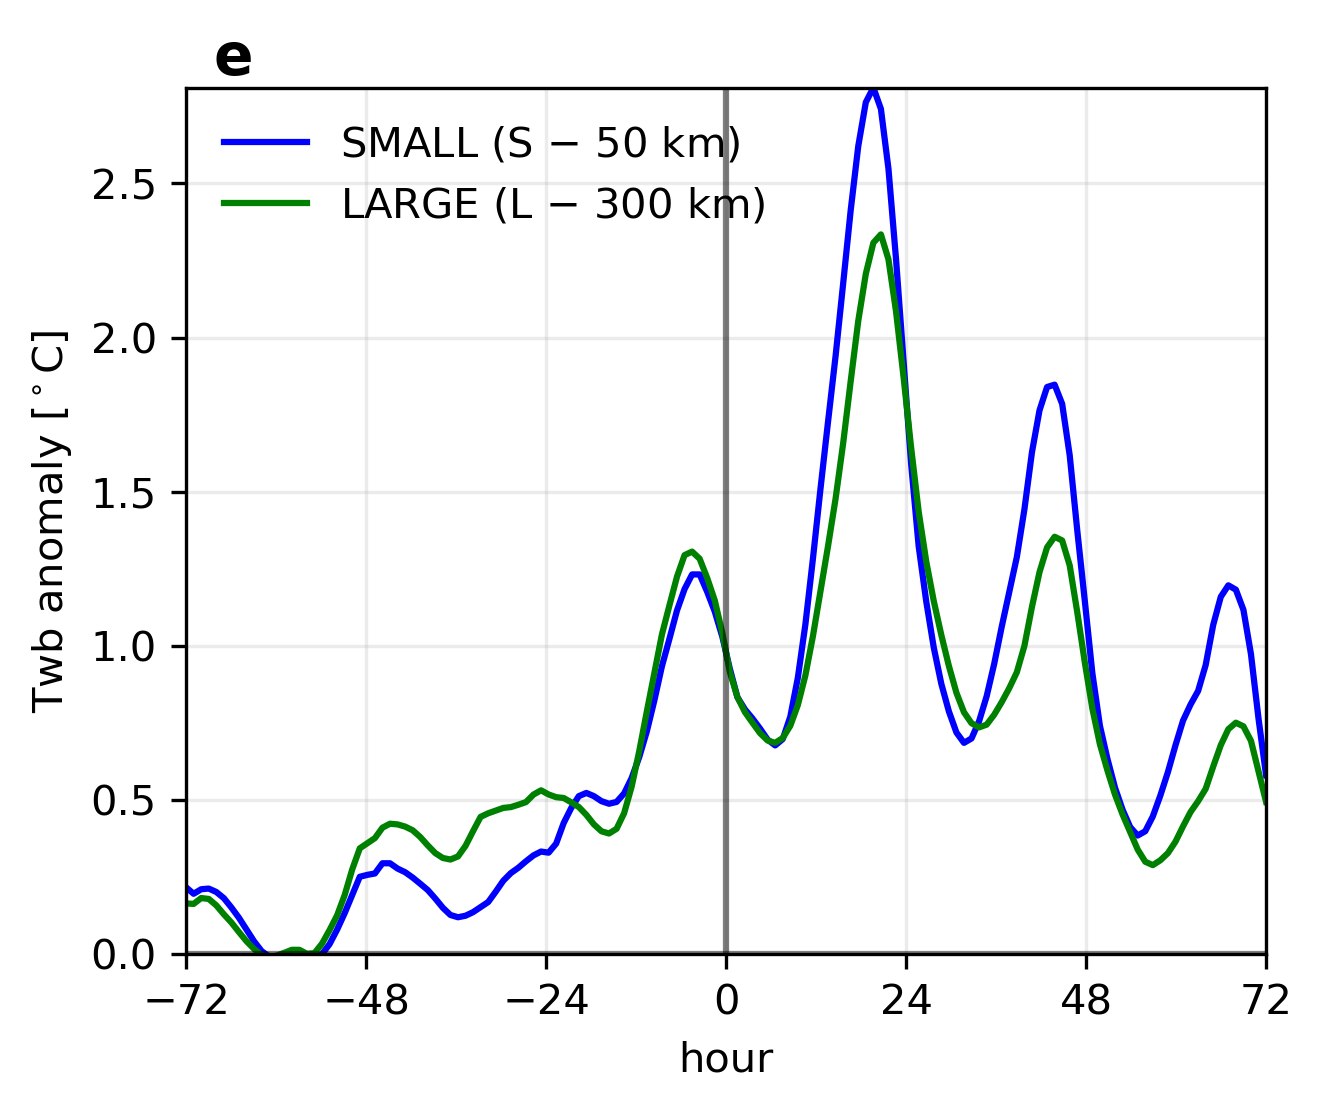

In [8]:
fig, ax = plt.subplots(nrows=1, dpi=300)

plt.subplots_adjust(left=0.15, right=0.95, bottom=0.125, top=0.95)

cols = {'small': 'b', 'large': 'g'}
ls = {25.: '-', 150.: '--'}

hsmall = Line2D([0], [0], label='SMALL (S $-$ 50 km)', color=cols['small'], ls='-')
hlarge = Line2D([0], [0], label='LARGE (L $-$ 300 km)', color=cols['large'], ls='-')

ylims_disc = []


for length in [lengths[0]]:
    print('\n >>> {0} km <<<'.format(length))

    out_var_data = []
    out_var_clim = []

    for icoord, coord in enumerate(coords):
        lat_range = coord[0]
        lon_range = coord[1]

        filenames = get_files_contrast_composites(ds, res, var_ref, y0, y1, months, lat_range, lon_range, min_hw_size, max_hw_size, t_thresh, q_thresh, n_days, meth, cnty, size_lengths)

        out_var_data_ = {}
        out_var_clim_ = {}

        for ilength, (size, files) in enumerate(filenames.items()):
            length_ = size_lengths[ilength]

            vardata = load_contrast_composite_var(ds, res, var_ref, var, y0, y1, months, t_thresh, q_thresh, n_days, meth, cnty, window, sw, tw, lat_range, lon_range, min_hw_size, max_hw_size, size, length_)
            varhclim = load_contrast_composite_var_clim(ds, res, var_ref, var, y0, y1, months, t_thresh, q_thresh, n_days, meth, cnty, window, sw, tw, lat_range, lon_range, min_hw_size, max_hw_size, size, length_)

            out_var_data_[size] = vardata
            out_var_clim_[size] = varhclim

        out_var_data.append(out_var_data_)
        out_var_clim.append(out_var_clim_)

    out_var_data_small = np.concatenate([out['small'] for out in out_var_data], axis=0)
    out_var_data_large = np.concatenate([out['large'] for out in out_var_data], axis=0)
    out_var_clim_small = np.concatenate([out['small'] for out in out_var_clim], axis=0)
    out_var_clim_large = np.concatenate([out['large'] for out in out_var_clim], axis=0)

    n_hhee = out_var_data_small.shape[0]
    nhours = out_var_data_small.shape[1]

    out_var_clim_small = out_var_clim_small.reshape(n_hhee, nhours, out_var_data_small.shape[2], out_var_data_small.shape[3])
    out_var_clim_large = out_var_clim_large.reshape(n_hhee, nhours, out_var_data_large.shape[2], out_var_data_large.shape[3])

    var_hhee_ano_small = out_var_data_small - out_var_clim_small
    var_hhee_ano_large = out_var_data_large - out_var_clim_large

    xs = np.arange(0.5, var_hhee_ano_small.shape[3], 1)
    ys = np.arange(0.5, var_hhee_ano_small.shape[2], 1)

    ds_clim_small = xr.DataArray(data=out_var_clim_small, dims=['n', 'time', 'y', 'x'], coords=dict(n=range(n_hhee), time=range(out_var_clim_small.shape[1]), x=(['x'], xs), y=(['y'], ys)))
    ds_data_small = xr.DataArray(data=out_var_data_small, dims=['n', 'time', 'y', 'x'], coords=dict(n=range(n_hhee), time=range(out_var_data_small.shape[1]), x=(['x'], xs), y=(['y'], ys)))
    ds_ano_small = xr.DataArray(data=var_hhee_ano_small, dims=['n', 'time', 'y', 'x'], coords=dict(n=range(n_hhee), time=range(var_hhee_ano_small.shape[1]), x=(['x'], xs), y=(['y'], ys)))
    ds_ano_large = xr.DataArray(data=var_hhee_ano_large, dims=['n', 'time', 'y', 'x'], coords=dict(n=range(n_hhee), time=range(var_hhee_ano_large.shape[1]), x=(['x'], xs), y=(['y'], ys)))


    # Select data within length scale

    xc = (xs[-1]-xs[0])/2+xs[0]
    yc = (ys[-1]-ys[0])/2+ys[0]

    xsm, ysm = np.meshgrid(xs, ys)

    r = length / 4.4  # nb of grid points

    distloc = ( ((xsm - xc) * (xsm - xc)) + ((ysm - yc) * (ysm - yc)) )**.5  # 2d-array of distance to center values
    disc_mask = np.broadcast_to(distloc <= r, var_hhee_ano_small.shape)

    clim_disc_small = ma.masked_array(ds_clim_small.values, ~disc_mask)
    clim_disc_small = ma.filled(clim_disc_small, fill_value=np.nan)
    data_disc_small = ma.masked_array(ds_data_small.values, ~disc_mask)
    data_disc_small = ma.filled(data_disc_small, fill_value=np.nan)
    ano_disc_small = ma.masked_array(ds_ano_small.values, ~disc_mask)
    ano_disc_small = ma.filled(ano_disc_small, fill_value=np.nan)
    ano_disc_large = ma.masked_array(ds_ano_large.values, ~disc_mask)
    ano_disc_large = ma.filled(ano_disc_large, fill_value=np.nan)

    clim_med = np.nanmean(out_var_clim_small, axis=0)  # mean across events
    clim_mean = clim_med.mean(axis=1).mean(axis=1)  # mean across space

    data_med = np.nanmean(out_var_data_small, axis=0)  # mean across events
    data_mean = data_med.mean(axis=1).mean(axis=1)  # mean across space

    clim_disc_med = np.nanmean(clim_disc_small, axis=0)  # mean across events
    clim_disc_mean = np.nanmean(clim_disc_med, axis=1)
    clim_disc_mean = np.nanmean(clim_disc_mean, axis=1)

    data_disc_med = np.nanmean(data_disc_small, axis=0)  # mean across events
    data_disc_mean = np.nanmean(data_disc_med, axis=1)
    data_disc_mean = np.nanmean(data_disc_mean, axis=1)

    data_anos_small_med = np.nanmean(ds_ano_small, axis=0)  # nanmean
    data_anos_small_mean = np.nanmean(data_anos_small_med, axis=1)
    data_anos_small_mean = np.nanmean(data_anos_small_mean, axis=1)

    data_disc_anos_small_med = np.nanmean(ano_disc_small, axis=0)  # nanmean
    data_disc_anos_small_mean = np.nanmean(data_disc_anos_small_med, axis=1)
    data_disc_anos_small_mean = np.nanmean(data_disc_anos_small_mean, axis=1)

    data_anos_large_med = np.nanmean(ds_ano_large, axis=0)  # nanmean
    data_anos_large_mean = np.nanmean(data_anos_large_med, axis=1)
    data_anos_large_mean = np.nanmean(data_anos_large_mean, axis=1)

    data_disc_anos_large_med = np.nanmean(ano_disc_large, axis=0)  # nanmean
    data_disc_anos_large_mean = np.nanmean(data_disc_anos_large_med, axis=1)
    data_disc_anos_large_mean = np.nanmean(data_disc_anos_large_mean, axis=1)

    ts = np.linspace(-out_var_data_small.shape[1]/2, out_var_data_small.shape[1]/2, out_var_data_small.shape[1])

    ax.plot(ts, data_disc_anos_small_mean, color=cols['small'], ls=ls[length], lw=1.5, label='SMALL')
    ax.plot(ts, data_disc_anos_large_mean, color=cols['large'], ls=ls[length], lw=1.5, label='LARGE')


    ano_disc_ymin = max(abs(data_disc_anos_small_mean.min()), abs(data_disc_anos_large_mean.min()))
    ano_disc_ymax = max(abs(data_disc_anos_small_mean.max()), abs(data_disc_anos_large_mean.max()))
    ylim_disc = max(ano_disc_ymin, ano_disc_ymax)
    ylims_disc.append(ylim_disc)


ylim = round(max(ylims_disc), 2)

ax.hlines(0, tw[0], tw[1], color='k', alpha=0.5)
ax.vlines(0, 0, ylim, color='k', alpha=0.5)


xtcks = np.linspace(tw[0], tw[1], 7)

ax.text(0.025, 1.015, flabel, weight="bold", fontsize=14, transform=ax.transAxes)

ax.set_xticks(xtcks)
ax.set_xlim(tw[0], tw[1])
ax.set_xlabel('hour')
ax.set_ylim(0, ylim)
ax.set_ylabel('{0} anomaly [{1}]'.format(var_, unit))
ax.grid(True, alpha=0.25)

ax.legend(handles=[hsmall, hlarge], loc='upper left', ncol=1, frameon=False)

fig.set_size_inches(4.5, 3.5)